# Title: Email Spam Classification Dataset CSV

`Author:` [Saifullah Haider](https://www.kaggle.com/saifullah007)\
 `Date:` 21.Mar.2024\
 `Dataset:` [Email Spam Classification Dataset CSV Kaggle](https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv)


## Meta-Data (About Dataset)

## Context
### Introduction

This is a csv file containing related information of 5172 randomly picked email files and their respective labels for spam or not-spam classification.

## Content
### About the Dataset

The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

# Exploratory Data Analysis (EDA)

Analyzing the dataset to understand its structure, distribution, and key insights.

In [7]:

# Import necessary libraries
import pandas as pd
# ignore Warning
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('F:/AI By Amar/AI/PAdas tips_tricks/Projects/email_classification/emails.csv')

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f'Total Missing Values: {missing_values}')


Total Missing Values: 0


In [9]:

# Get summary statistics of numerical features
df.describe()


,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


## Data Visualization

Visualizing class distribution to understand data balance.

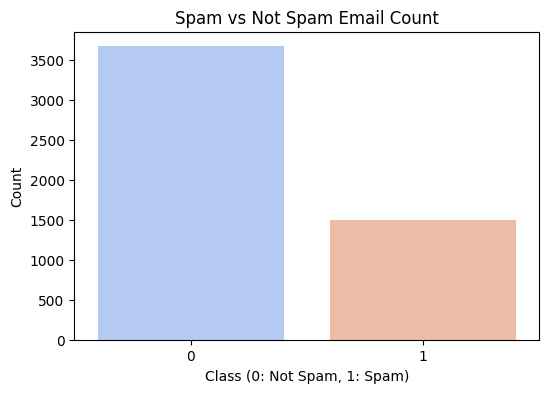

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Prediction', data=df, palette='coolwarm')
plt.title('Spam vs Not Spam Email Count')
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()


# Model Training & Evaluation

Training Logistic Regression and KNN models and evaluating their performance.

In [11]:
# import libraries
# 1.To handle the data
import pandas as pd  
import numpy as np
# 2.To visaulize the data
import matplotlib.pyplot as plt
import seaborn as sns
#Machine Learning
from sklearn.model_selection import train_test_split
# For Classification
from sklearn.linear_model import LogisticRegression
# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
# ignore Warning
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load the dta from csv file placed locally in our pc
df=pd.read_csv('emails.csv')
# print hte first 5 row of the datframe
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [13]:
# # Ensure 'Email No.' column is removed
df.drop(columns=['Email No.'], errors='ignore', inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Check if any non-numeric values remain
print(df.dtypes.unique())

# Separate features and target variable
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)

[dtype('int64')]
0.970048309178744
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.94      0.95      0.95       300

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



array([[718,  17],
       [ 14, 286]])

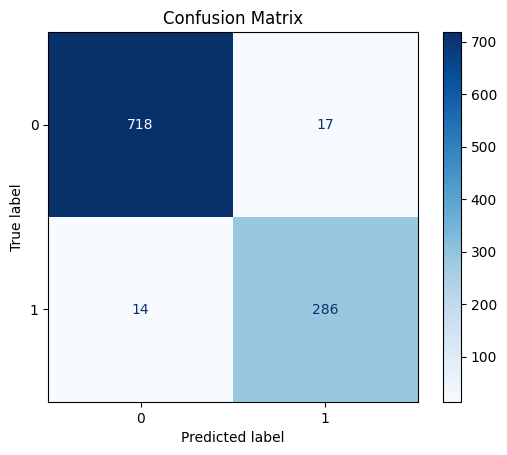

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

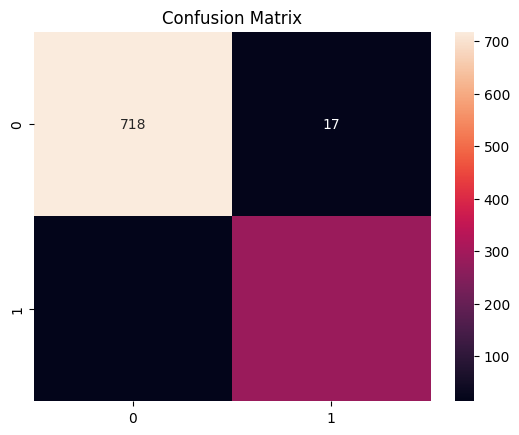

In [15]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()